# NBodySimulator tests

Stuff I found at https://github.com/SciML/NBodySimulator.jl

In [13]:
import Pkg; Pkg.add("NBodySimulator"); Pkg.add("StaticArrays")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [18]:
const G = 6.67e-11 # m^3/kg/s^2

6.67e-11

In [185]:
using NBodySimulator
using StaticArrays
#body1 = MassBody(SVector(0.0, 1.0, 0.0), SVector( 5.775e-6, 0.0, 0.0), 2.0)
#body2 = MassBody(SVector(0.0,-1.0, 0.0), SVector(-5.775e-6, 0.0, 0.0), 2.0) 
body1 = MassBody(SVector(0.0, 1.0, 0.0), SVector( 1e-6, 0.0, 0.0), 2.0)
body2 = MassBody(SVector(0.0,-1.0, 0.0), SVector(-1e-6, 0.0, 0.0), 2.0) 

MassBody{Float64,Float64}([0.0, -1.0, 0.0], [-1.0e-6, 0.0, 0.0], 2.0)

In [186]:
system = GravitationalSystem([body1,body2], G)

GravitationalSystem{MassBody{Float64,Float64},Float64}(MassBody{Float64,Float64}[MassBody{Float64,Float64}([0.0, 1.0, 0.0], [1.0e-6, 0.0, 0.0], 2.0), MassBody{Float64,Float64}([0.0, -1.0, 0.0], [-1.0e-6, 0.0, 0.0], 2.0)], 6.67e-11)

In [187]:
tspan = (0.0, 1111150.0)
simulation = NBodySimulation(system, tspan)
sim_result = run_simulation(simulation)

N: 2
Timespan: (0.0, 1.11115e6)
Boundary conditions: InfiniteBox{Float64}([-Inf, Inf, -Inf, Inf, -Inf, Inf])
Potentials: 
Gravitational:
	G:6.67e-11
Time steps: 64
t: 0.0, 1.11115e6


┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/path_to_animated_particles.gif
└ @ Plots /Users/jason/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/path_to_animated_particles.gif")
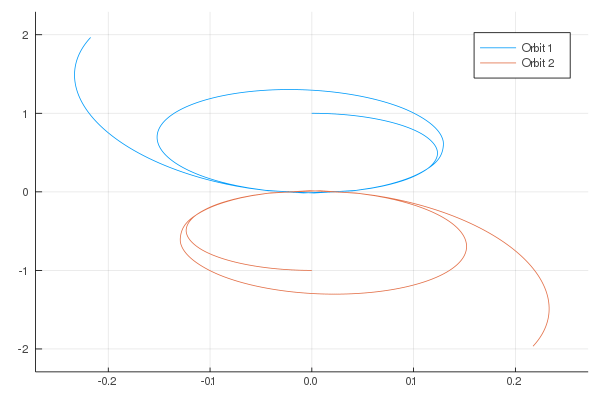

In [188]:
using Plots
animate(sim_result, "path_to_animated_particles.gif")

┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/tmp.gif
└ @ Plots /Users/jason/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/tmp.gif")
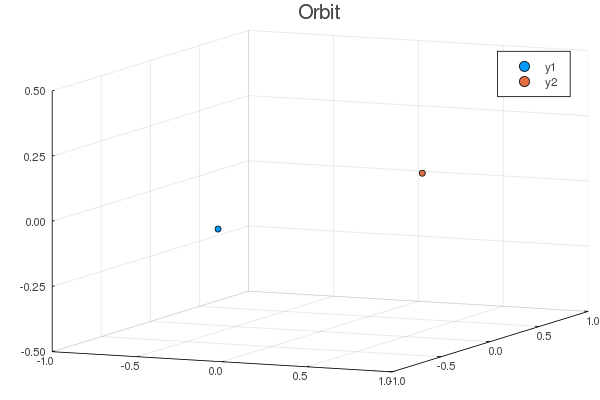

In [189]:
plt = plot3d(
    2,
    xlim = (-1, 1),
    ylim = (-1, 1),
    zlim = (-0.5, 0.5),
    title = "Orbit",
    marker = :circle,
    linetype = :scatter3d
)

@gif for i=1:19
    r = get_position(sim_result, i*(tspan[2]/19))
    #println(rotl90(r)[1:2], rotl90(r)[3:4], rotl90(r)[5:6])
    push!(plt, rotl90(r)[1:2], rotl90(r)[3:4], rotl90(r)[5:6])
    #scatter!(plt, x = rotl90(r)[1:2], y = rotl90(r)[3:4], z = rotl90(r)[5:6])
end

Grabbed another example from https://rosettacode.org/wiki/N-body_problem#Julia

In [178]:
using StaticArrays, Plots, NBodySimulator
 
const bodies = [
    MassBody(SVector(0.0, 1.0, 0.0), SVector( 5.775e-6, 0.0, 0.0), 2.0),
    MassBody(SVector(0.0,-1.0, 0.0), SVector(-5.775e-6, 0.0, 0.0), 2.0),
    MassBody(SVector(0.0, 4.5, 0.0), SVector(-2.5e-6, 0.0, 0.0), 1.0)
]
 
const timespan = (0.0, 1111150.0)
 
function nbodysim(nbodies, tspan)
    system = GravitationalSystem(nbodies, G)
    simulation = NBodySimulation(system, tspan)
    run_simulation(simulation)
end
 
simresult = nbodysim(bodies, timespan)

N: 3
Timespan: (0.0, 1.11115e6)
Boundary conditions: InfiniteBox{Float64}([-Inf, Inf, -Inf, Inf, -Inf, Inf])
Potentials: 
Gravitational:
	G:6.67e-11
Time steps: 25
t: 0.0, 1.11115e6


┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/tmp.gif
└ @ Plots /Users/jason/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/tmp.gif")
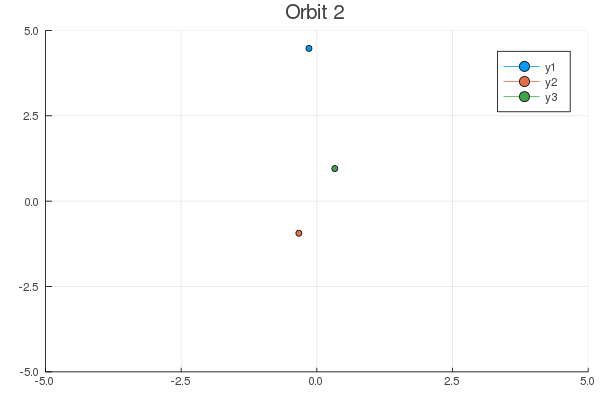

In [179]:
#animate(simresult)
#plt2 = plot3d(
plt2 = plot(
    3,
    xlim = (-5, 5),
    ylim = (-5, 5),
    #zlim = (-0.1, 0.1),
    title = "Orbit 2",
    marker = :circle,
    #linetype = :scatter3d
)

@gif for i=1:19
    r = get_position(simresult, i*(tspan[2]/19))
    #println(rotl90(r)[1:3], rotl90(r)[4:6], rotl90(r)[7:9])
    #push!(plt2, rotl90(r)[1:3], rotl90(r)[4:6], rotl90(r)[7:9])
    push!(plt2, rotl90(r)[1:3], rotl90(r)[4:6])
end